In [8]:
%ls ../checkpoints/sam-img-complete/logs/train_stats.json
%ls ../checkpoints/sam-img-crop/logs/train_stats.json


../checkpoints/sam-img-complete/logs/train_stats.json
../checkpoints/sam-img-crop/logs/train_stats.json


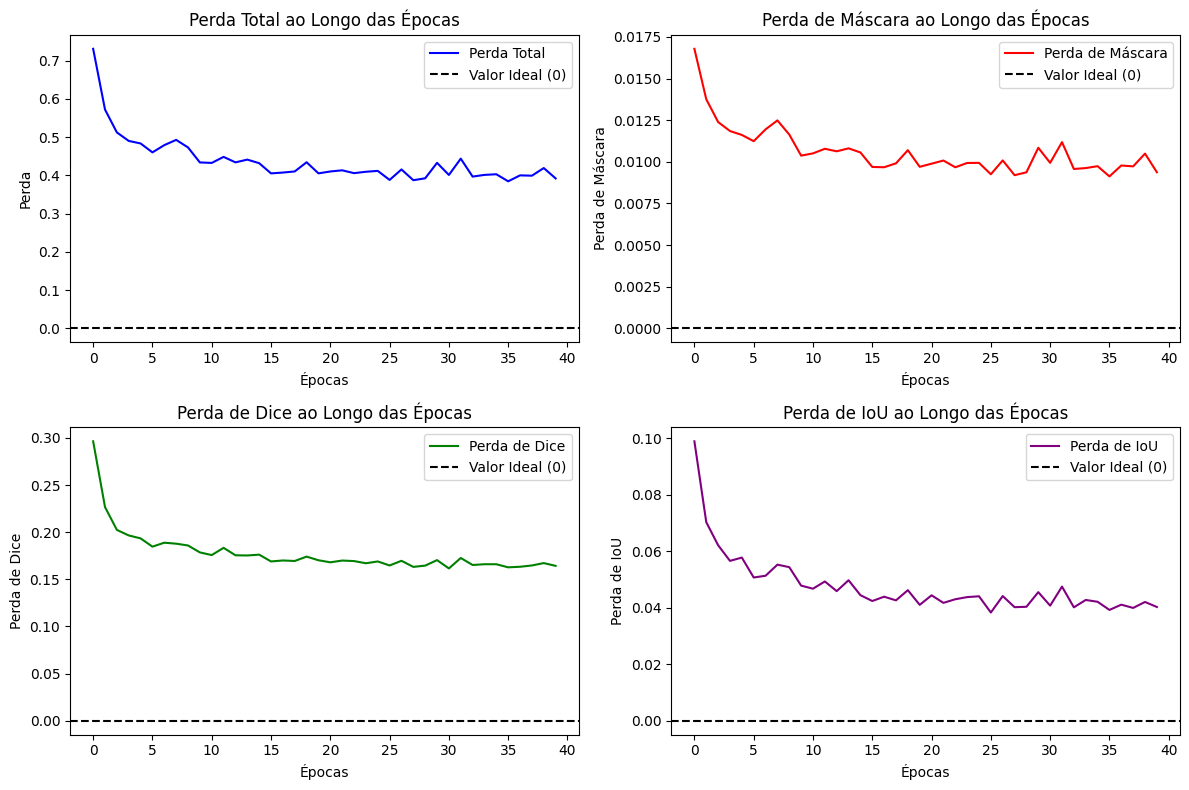

In [9]:
import json
import matplotlib.pyplot as plt

with open('../checkpoints/sam-img-crop/logs/train_stats.json', 'r') as f:
    data = []
    for line in f:
        try:
            data.append(json.loads(line))  # Tenta carregar cada linha como um objeto JSON
        except json.JSONDecodeError:
            continue  # Ignora linhas com erro

epochs = [entry['Trainer/epoch'] for entry in data]
train_loss = [entry['Losses/train_all_loss'] for entry in data]
mask_loss = [entry['Losses/train_all_loss_mask'] for entry in data]
dice_loss = [entry['Losses/train_all_loss_dice'] for entry in data]
iou_loss = [entry['Losses/train_all_loss_iou'] for entry in data]

ideal_value = 0

# Criando gráficos para cada métrica
plt.figure(figsize=(12, 8))

# Perda total
plt.subplot(2, 2, 1)
plt.plot(epochs, train_loss, label='Perda Total', color='blue')
plt.axhline(ideal_value, color='black', linestyle='--', label='Valor Ideal (0)')  # Linha para o valor ideal
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Perda Total ao Longo das Épocas')
plt.legend()

# Perda de Máscara
plt.subplot(2, 2, 2)
plt.plot(epochs, mask_loss, label='Perda de Máscara', color='red')
plt.axhline(ideal_value, color='black', linestyle='--', label='Valor Ideal (0)')  # Linha para o valor ideal
plt.xlabel('Épocas')
plt.ylabel('Perda de Máscara')
plt.title('Perda de Máscara ao Longo das Épocas')
plt.legend()

# Perda de Dice
plt.subplot(2, 2, 3)
plt.plot(epochs, dice_loss, label='Perda de Dice', color='green')
plt.axhline(ideal_value, color='black', linestyle='--', label='Valor Ideal (0)')  # Linha para o valor ideal
plt.xlabel('Épocas')
plt.ylabel('Perda de Dice')
plt.title('Perda de Dice ao Longo das Épocas')
plt.legend()

# Perda de IoU
plt.subplot(2, 2, 4)
plt.plot(epochs, iou_loss, label='Perda de IoU', color='purple')
plt.axhline(ideal_value, color='black', linestyle='--', label='Valor Ideal (0)')  # Linha para o valor ideal
plt.xlabel('Épocas')
plt.ylabel('Perda de IoU')
plt.title('Perda de IoU ao Longo das Épocas')
plt.legend()

# Ajuste o layout para que os gráficos não se sobreponham
plt.tight_layout()
plt.show()





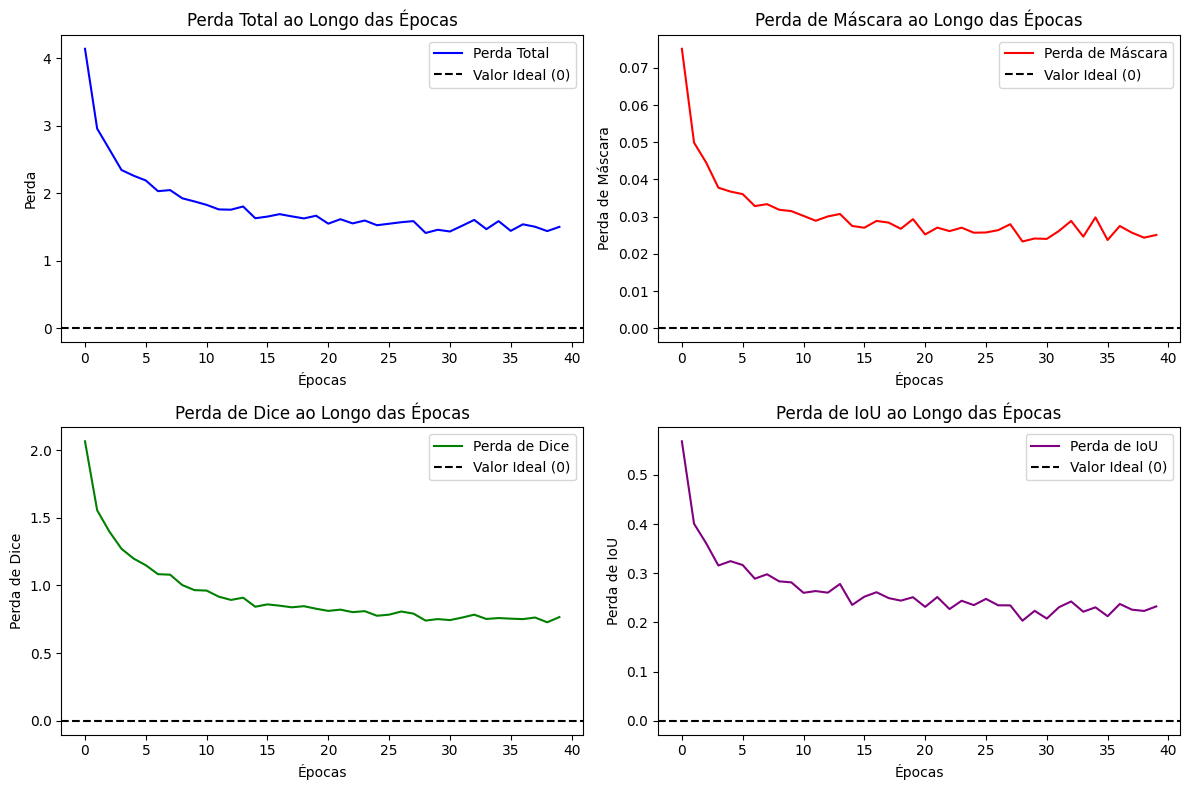

In [10]:
import json
import matplotlib.pyplot as plt

with open('../checkpoints/sam-img-complete/logs/train_stats.json', 'r') as f:
    data = []
    for line in f:
        try:
            data.append(json.loads(line))  # Tenta carregar cada linha como um objeto JSON
        except json.JSONDecodeError:
            continue  # Ignora linhas com erro

epochs = [entry['Trainer/epoch'] for entry in data]
train_loss = [entry['Losses/train_all_loss'] for entry in data]
mask_loss = [entry['Losses/train_all_loss_mask'] for entry in data]
dice_loss = [entry['Losses/train_all_loss_dice'] for entry in data]
iou_loss = [entry['Losses/train_all_loss_iou'] for entry in data]

ideal_value = 0

# Criando gráficos para cada métrica
plt.figure(figsize=(12, 8))

# Perda total
plt.subplot(2, 2, 1)
plt.plot(epochs, train_loss, label='Perda Total', color='blue')
plt.axhline(ideal_value, color='black', linestyle='--', label='Valor Ideal (0)')  # Linha para o valor ideal
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Perda Total ao Longo das Épocas')
plt.legend()

# Perda de Máscara
plt.subplot(2, 2, 2)
plt.plot(epochs, mask_loss, label='Perda de Máscara', color='red')
plt.axhline(ideal_value, color='black', linestyle='--', label='Valor Ideal (0)')  # Linha para o valor ideal
plt.xlabel('Épocas')
plt.ylabel('Perda de Máscara')
plt.title('Perda de Máscara ao Longo das Épocas')
plt.legend()

# Perda de Dice
plt.subplot(2, 2, 3)
plt.plot(epochs, dice_loss, label='Perda de Dice', color='green')
plt.axhline(ideal_value, color='black', linestyle='--', label='Valor Ideal (0)')  # Linha para o valor ideal
plt.xlabel('Épocas')
plt.ylabel('Perda de Dice')
plt.title('Perda de Dice ao Longo das Épocas')
plt.legend()

# Perda de IoU
plt.subplot(2, 2, 4)
plt.plot(epochs, iou_loss, label='Perda de IoU', color='purple')
plt.axhline(ideal_value, color='black', linestyle='--', label='Valor Ideal (0)')  # Linha para o valor ideal
plt.xlabel('Épocas')
plt.ylabel('Perda de IoU')
plt.title('Perda de IoU ao Longo das Épocas')
plt.legend()

# Ajuste o layout para que os gráficos não se sobreponham
plt.tight_layout()
plt.show()





"""
### 1. **Perda Total (`train_all_loss`)**
   - **O que significa:** A perda total é a combinação de todas as perdas do modelo durante o treinamento. Geralmente, é uma soma ponderada de diferentes componentes de perdas (como a perda de classificação, de máscara, etc.).
   - **Objetivo:** O objetivo é minimizar essa perda total ao longo das épocas. Isso indica quão bem o modelo está aprendendo em relação a todas as métricas de desempenho.

### 2. **Perda de Máscara (`train_all_loss_mask`)**
   - **O que significa:** A perda de máscara refere-se à diferença entre as máscaras preditas pelo modelo e as verdadeiras máscaras (ground truth). Essa métrica é importante em tarefas como segmentação, onde o objetivo é segmentar corretamente os objetos ou áreas de interesse nas imagens.
   - **Objetivo:** O valor ideal seria 0, significando que o modelo está gerando as máscaras de forma perfeita (sem erro). Quanto menor a perda de máscara, melhor o modelo está segmentando as imagens.

### 3. **Perda de Dice (`train_all_loss_dice`)**
   - **O que significa:** A perda de Dice é uma métrica comumente usada em tarefas de segmentação, especialmente quando se trabalha com imagens médicas. Ela é baseada na similaridade entre duas amostras (neste caso, a máscara predita e a máscara real), medida pela fórmula do coeficiente de Dice. A perda de Dice é inversamente proporcional à similaridade: quanto maior a similaridade, menor a perda.
   - **Objetivo:** O valor ideal da perda de Dice é 0, o que significa que a predição do modelo corresponde perfeitamente à verdade real. Valores próximos de 1 indicam um erro alto na predição.

### 4. **Perda de IoU (Intersection over Union, `train_all_loss_iou`)**
   - **O que significa:** A métrica IoU é outra maneira de medir a sobreposição entre as áreas preditas e as áreas reais (ground truth). Ela é calculada pela razão entre a interseção e a união das áreas preditas e reais. Em termos de segmentação de imagens, IoU é frequentemente usada para avaliar a qualidade da segmentação.
   - **Objetivo:** O valor ideal da IoU também é 0, significando que não há sobreposição incorreta entre a predição e a realidade (sem erro de previsão). Quanto mais próximo de 0 a perda de IoU estiver, melhor será o desempenho do modelo. Valores próximos de 1 indicam uma boa predição.

### **Resumo do Objetivo das Métricas:**
- **Perda Total:** Tenta minimizar o erro global do modelo.
- **Perda de Máscara:** Mede a precisão da segmentação de objetos (especialmente importante para tarefas de segmentação).
- **Perda de Dice:** Avalia a qualidade da segmentação comparando a sobreposição das áreas preditas e reais.
- **Perda de IoU:** Avalia a precisão de como a área predita se sobrepõe à área real (usado em segmentação, mas também em outras tarefas de detecção).
"""